In [1]:
!pip install yfinance matplotlib pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf # (1) Yahoo Finance 라이브러리 임포트

In [3]:
ticker = "005930.KS" # (2) 예: 삼성전자 종목 코드
start_date = "2025-01-01"
end_date = "2025-11-13" # (오늘 날짜 또는 최근 날짜)

print(f"--- 1. {ticker} 주식 데이터 다운로드 중 ({start_date}~{end_date}) ---")


--- 1. 005930.KS 주식 데이터 다운로드 중 (2025-01-01~2025-11-13) ---


In [4]:
# (3) yf.download() 함수로 데이터 다운로드
stock_df = yf.download(ticker, start=start_date, end=end_date)

if stock_df.empty:
  print(f"{ticker} 데이터를 가져오는 데 실패했습니다. 기간이나 종목 코드를 확인하세요.")
else:
  print(stock_df.head()) # (Open, High, Low, Close, Adj Close, Volume)

/tmp/ipython-input-3170268200.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open    Volume
Ticker         005930.KS     005930.KS     005930.KS     005930.KS 005930.KS
Date                                                                        
2025-01-02  52526.632812  52723.361774  51444.623522  51838.081446  16630538
2025-01-03  53510.281250  54198.832663  51936.449449  51936.449449  19318046
2025-01-06  54985.750000  55280.843470  53411.918157  53510.282648  19034284
2025-01-07  54493.921875  56362.846993  54493.921875  55871.024594  17030235
2025-01-08  56362.851562  56559.580538  53805.374877  53903.739365  26593553



--- 2. 실제 주식 데이터 선 그래프 생성 완료 ---


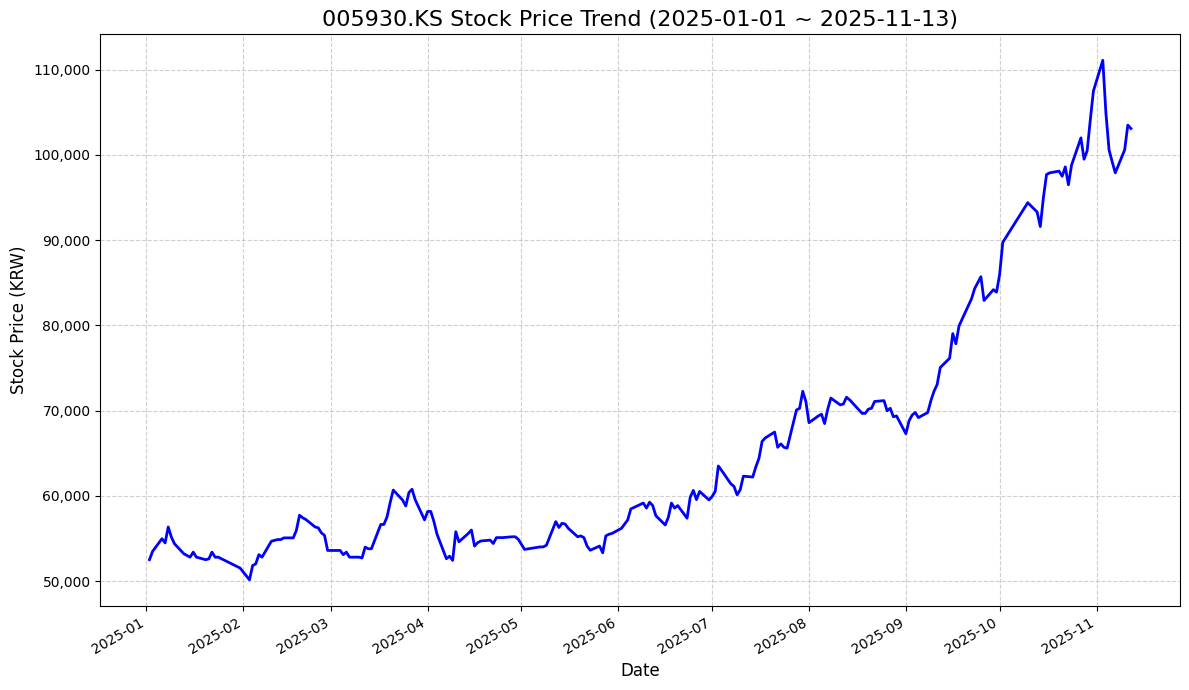

In [5]:

plt.figure(figsize=(12, 7))

# 2-1. 선 그래프 생성 (핵심!)
# (4) Y축 데이터를 'Price' -> 'Close' (종가)로 변경
# (4) X축 데이터는 yfinance가 자동으로 인덱스(날짜)로 설정해 줌
plt.plot(stock_df.index, stock_df['Close'],
          color='blue',     # 삼성전자 색상
          linestyle='-',
          linewidth=2
)

# --- 3. 그래프 꾸미기 ---
plt.title(f'{ticker} Stock Price Trend ({start_date} ~ {end_date})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (KRW)', fontsize=12)

plt.gcf().autofmt_xdate() # X축 날짜 자동 포맷팅

# Y축 포맷팅 (쉼표 추가)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# --- 4. 그래프 표시 ---
print("\n--- 2. 실제 주식 데이터 선 그래프 생성 완료 ---")
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf # (1) Yahoo Finance 라이브러리 임포트
from matplotlib.ticker import FuncFormatter # Y축 포맷팅을 위해 임포트

In [7]:
# (2) tickers 리스트로 변경 (삼성전자, SK하이닉스)
tickers = ["005930.KS", "000660.KS"]
start_date = "2025-01-01"
end_date = "2025-11-13" # (오늘 날짜 또는 최근 날짜)

print(f"--- 1. {tickers} 주식 데이터 다운로드 중 ({start_date}~{end_date}) ---")

# (3) yf.download()로 두 종목의 'Close' 데이터만 선택
stock_df = yf.download(tickers, start=start_date, end=end_date)['Close']

if stock_df.empty:
  print(f"{tickers} 데이터를 가져오는 데 실패했습니다. 기간이나 종목 코드를 확인하세요.")
else:
  # (4) 가독성을 위해 컬럼 이름 변경 (선택 사항)
  stock_df = stock_df.rename(columns={
    "005930.KS": "Samsung",
    "000660.KS": "SK Hynix"
  })
  print(stock_df.head()) # (날짜 인덱스, Samsung 종가, SK Hynix 종가)

--- 1. ['005930.KS', '000660.KS'] 주식 데이터 다운로드 중 (2025-01-01~2025-11-13) ---


/tmp/ipython-input-2432494781.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Ticker           SK Hynix       Samsung
Date                                   
2025-01-02  169548.703125  52526.632812
2025-01-03  180145.500000  53510.281250
2025-01-06  197872.843750  54985.750000
2025-01-07  193119.156250  54493.921875
2025-01-08  192822.031250  56362.851562



--- 2. 실제 주식 데이터 선 그래프 생성 완료 ---


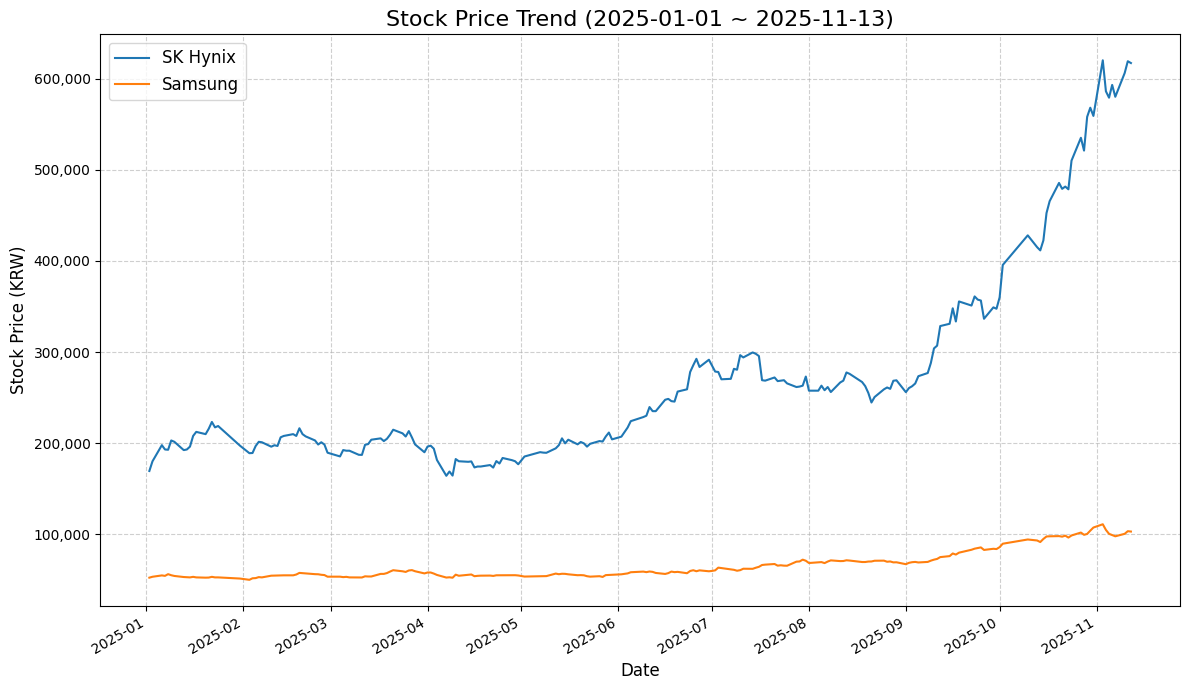

In [8]:


# --- 2. Matplotlib으로 선 그래프 시각화 ---
plt.figure(figsize=(12, 7))

# (5) plt.plot()에 DataFrame 전체를 전달하면
#     인덱스가 X축, 각 컬럼이 Y축 선이 됩니다.
plt.plot(stock_df)

# --- 3. 그래프 꾸미기 ---
plt.title(f'Stock Price Trend ({start_date} ~ {end_date})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (KRW)', fontsize=12)

plt.gcf().autofmt_xdate() # X축 날짜 자동 포맷팅

# (6) 범례(Legend) 추가 (필수)
# (컬럼 이름인 'Samsung', 'SK Hynix'가 범례가 됨)
plt.legend(stock_df.columns, fontsize=12)

# Y축 포맷팅 (쉼표 추가)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# --- 4. 그래프 표시 ---
print("\n--- 2. 실제 주식 데이터 선 그래프 생성 완료 ---")
plt.show()